In [50]:
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd 
from sklearn.cluster import KMeans  

In [51]:
dataset = pd.read_csv('Mall_Customers_data.csv') 

In [52]:
x = dataset.iloc[:, [3, 4]].values  
dataset.head(200)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


[1, 269981.28]
[2, 181363.59595959593]
[3, 106348.37306211118]
[4, 73679.78903948836]
[5, 44448.45544793371]


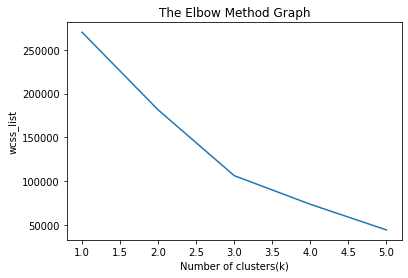

In [53]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  

#Using for loop for iterations from 1 to 10.  
for i in range(1, 6):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 50)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_) 
[print([i+1,wcss_list[i]]) for i in range(5)]
mtp.plot(range(1, 6), wcss_list)  
mtp.title('The Elbow Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  

In [54]:
#From the above plot, we can see the elbow point is at 3. So the number of clusters here will be 3
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 50)  
y_predict= kmeans.fit_predict(x)  


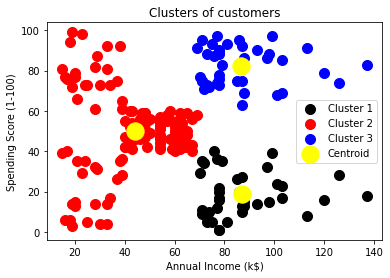

In [55]:
#visulaizing the clusters  
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'black', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'red', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'blue', label = 'Cluster 3') #for third cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of customers')  
mtp.xlabel('Annual Income (k$)')  
mtp.ylabel('Spending Score (1-100)')  
mtp.legend()  
mtp.show()  

In [56]:
def clustering_kmeans(X,k):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state= 50)  
    y= kmeans.fit_predict(X)  
    return kmeans,y

# Using the Elbow method the optimal value of cluster(k) is 3 for the given dataset
k_means, y = clustering_kmeans(x, 3)

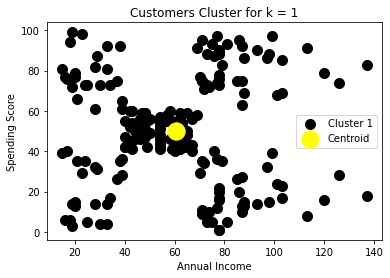

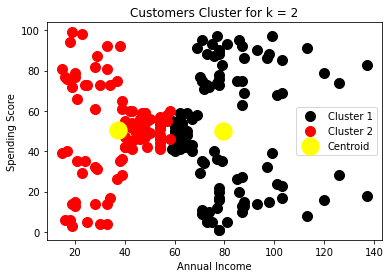

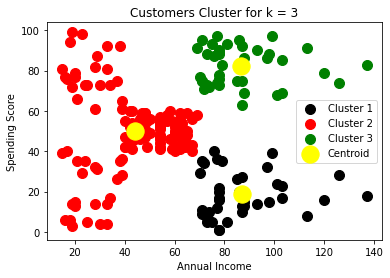

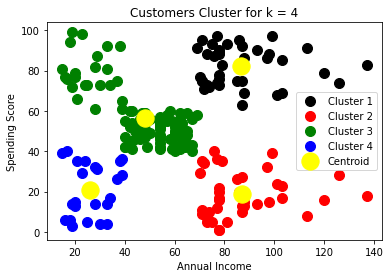

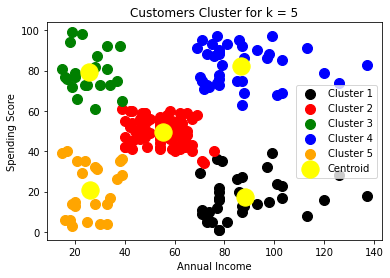

In [60]:
for i in range(5) :
    k_means, y = clustering_kmeans(x, i+1)
    mtp.scatter(x[y == 0, 0], x[y == 0, 1], s = 100, c = 'black', label = 'Cluster 1') #for first cluster  
    if i>0:
        mtp.scatter(x[y == 1, 0], x[y == 1, 1], s = 100, c = 'red', label = 'Cluster 2') #for second cluster  
    if i>1:
        mtp.scatter(x[y== 2, 0], x[y == 2, 1], s = 100, c = 'green', label = 'Cluster 3') #for third cluster  
    if i>2:
        mtp.scatter(x[y == 3, 0], x[y == 3, 1], s = 100, c = 'blue', label = 'Cluster 4') #for fourth cluster  
    if i>3:
        mtp.scatter(x[y == 4, 0], x[y == 4, 1], s = 100, c = 'orange', label = 'Cluster 5') #for fifth cluster  
    mtp.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
    mtp.title('Customers Cluster for k = ' + str(i+1))  
    mtp.xlabel('Annual Income')  
    mtp.ylabel('Spending Score')  
    mtp.legend()  
    mtp.show()  